In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()

In [4]:
features= iris.feature_names

x= pd.DataFrame(iris.data, columns=features)
y= pd.DataFrame(iris.target, columns=['target'])

In [5]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=4)
principal_components = pca.fit_transform(x)

principal_df = pd.DataFrame(principal_components, columns=('PC1','PC2','PC3','PC4'))
principal_df.head()

,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


In [7]:
print("Component_Vectors") #eigenvectors
print(pca.components_)

print("Explained variance")
print(pca.explained_variance_)

print("Explained variance ratio")
print(pca.explained_variance_ratio_)

Component_Vectors
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]
Explained variance
[4.22824171 0.24267075 0.0782095  0.02383509]
Explained variance ratio
[0.92461872 0.05306648 0.01710261 0.00521218]


In [28]:
# hier fehlt was
print(principal_df['PC1'][0])

print(x.mean(axis=0) ) # berechne mean über die einzelnen features von iris
x_mean = x-x.mean(axis=0) # calculate the difference (which is kind of the variance)

print(x_mean)
print('iloc[0]')
print(x_mean.iloc[0])
print('principal_components')
print(principal_components[0])

print(x_mean.iloc[0].dot(pca.components_[0]))

-2.6841256259695374
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.743333          0.442667             -2.358         -0.999333
1            -0.943333         -0.057333             -2.358         -0.999333
2            -1.143333          0.142667             -2.458         -0.999333
3            -1.243333          0.042667             -2.258         -0.999333
4            -0.843333          0.542667             -2.358         -0.999333
..                 ...               ...                ...               ...
145           0.856667         -0.057333              1.442          1.100667
146           0.456667         -0.557333              1.242          0.700667
147           0.656667         -0.057333              1.442          0.800667
148           0.356667          0.342667              1.642      

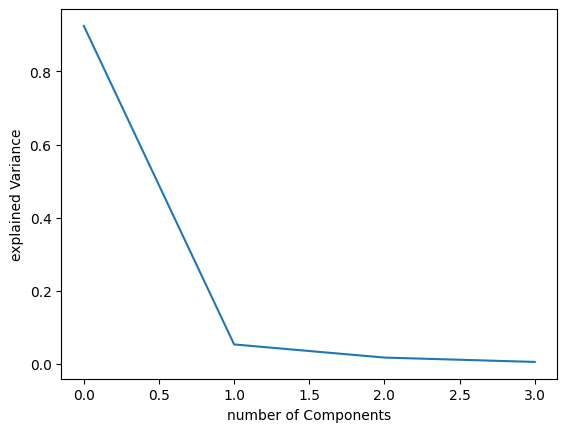

In [11]:
import matplotlib.pyplot as plt

# That shows us that with the first eigenvectors or components we can capture moren than 95% of the variance in the dataset

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of Components')
plt.ylabel('explained Variance')
plt.show()

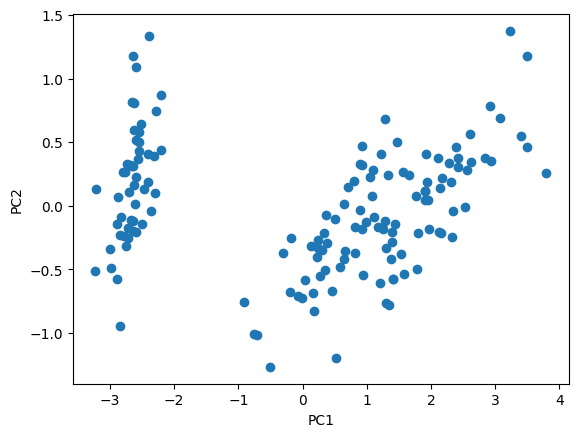

In [12]:
# plot a scatter plot of the first two principal components and color the points by their class
plt.scatter(principal_df['PC1'],principal_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

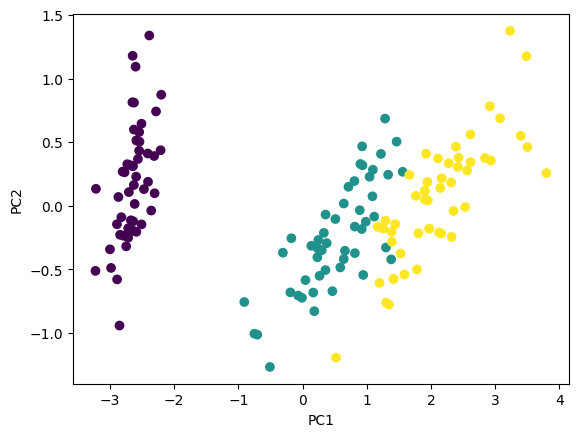

In [32]:
df = pd.concat([principal_df, y], axis=1)
plt.scatter(df['PC1'],df['PC2'], c=df['target'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


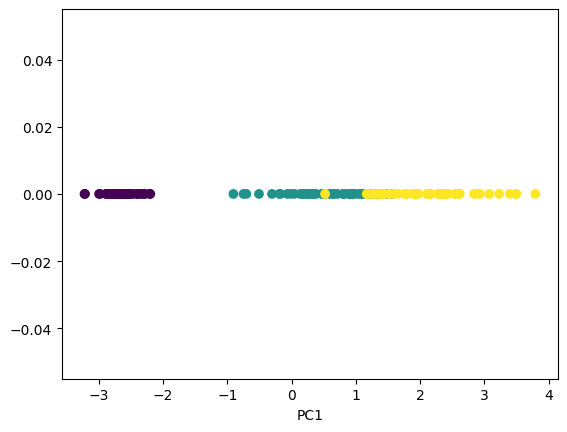

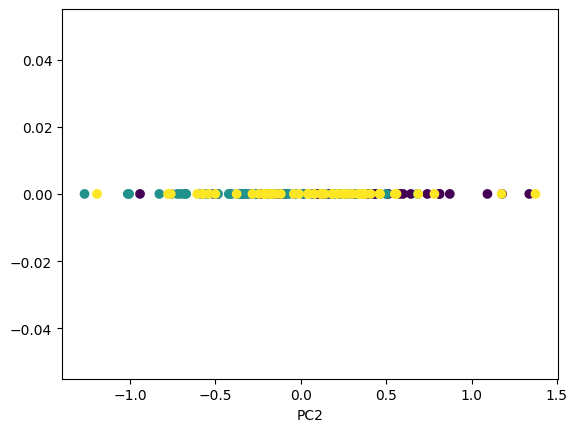

In [34]:

#Plot a scatter of only PC1
plt.scatter(df['PC1'],np.zeros(len(df)),c=df['target'])
plt.xlabel('PC1')
plt.show()

#plot a scatter of only PC2
plt.scatter(df['PC2'],np.zeros(len(df)),c=df['target'])
plt.xlabel('PC2')
plt.show()

# What we can see is that the range of values is in PC1 greater than in PC2, so in PC2 is the difference between points smaller. That menas PC1 captures more the variance between the points

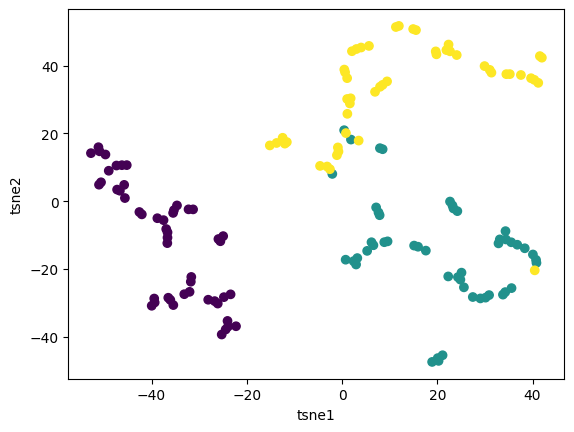

In [38]:
# import tsne from sklearn
from sklearn.manifold import TSNE

# you have to only play here with the perplexity
# preplexity is the factor how to transform the distances into probabilites
tsne = TSNE(n_components=2,perplexity=3.0, n_iter=1000, random_state=0)


tsne_components = tsne.fit_transform(x)


tsne_df = pd.DataFrame(tsne_components, columns=['tsne1','tsne2'])

tsne_df = pd.concat([tsne_df,y],axis=1)  

plt.scatter(tsne_df['tsne1'], tsne_df['tsne2'], c=tsne_df['target'])
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()
